In [195]:
#for manipulation das
import pandas as pd
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#prediction
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [196]:
def load_dataset(df):
    return pd.read_csv(df)
boston_dataframe=load_dataset('boston.csv')

In [197]:
def print_summarize_dataset(dataset):
    # Dataset dimension
    print("Dataset dimension:")
    print(dataset.shape)
    print("\nFirst 10 rows of dataset:")
    # First 10 rows of dataset
    print(dataset.head(10))
    print("\nStatistical summary:")
    # Statistical summary
    print(dataset.describe())
print_summarize_dataset(boston_dataframe)

Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

In [198]:
def clean_dataset(df):
    df = df.drop_duplicates().fillna(method='ffill')
    return df

In [199]:
boston_dataframe=clean_dataset(boston_dataframe)
boston_dataframe

C:\Users\lomak\AppData\Local\Temp\ipykernel_14516\341222244.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [200]:
def print_histograms(boston_dataframe):
    #fig = px.histogram(boston_dataframe,x='NOX',text_auto=True)
    fig = make_subplots(rows=3, cols=5,subplot_titles=['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 
                                                       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                                                       'PTRATIO', 'B', 'LSTAT', 'MDEV'],)
    
    fig.add_trace(go.Histogram(x=boston_dataframe['CRIM']),row=1,col=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['ZN']),row=1,col=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['INDUS']),row=1,col=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['CHAS']),row=1,col=4)
    fig.add_trace(go.Histogram(x=boston_dataframe['NOX']),row=1,col=5)
    fig.add_trace(go.Histogram(x=boston_dataframe['RM']),row=2,col=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['AGE']),row=2,col=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['DIS']),row=2,col=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['RAD']),row=2,col=4)
    fig.add_trace(go.Histogram(x=boston_dataframe['TAX']),row=2,col=5)
    fig.add_trace(go.Histogram(x=boston_dataframe['PTRATIO']),row=3,col=1)
    fig.add_trace(go.Histogram(x=boston_dataframe['B']),row=3,col=2)
    fig.add_trace(go.Histogram(x=boston_dataframe['LSTAT']),row=3,col=3)
    fig.add_trace(go.Histogram(x=boston_dataframe['MDEV']),row=3,col=4)   
    
    
    fig.update_layout(height=800, width=1600, title="Distribution of Boston Dataframe",showlegend=False)
    
    fig.show()
print_histograms(boston_dataframe)

In [201]:
boston_dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')

In [202]:
def compute_correlations_matrix(boston_dataframe):
    return boston_dataframe.select_dtypes(np.number).corr()
compute_correlations_matrix(boston_dataframe)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [203]:
correlations = compute_correlations_matrix(boston_dataframe)
print(f'only MDEV-->\n{correlations['MDEV']}')


only MDEV-->
CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


AttributeError: 'PairGrid' object has no attribute 'show'

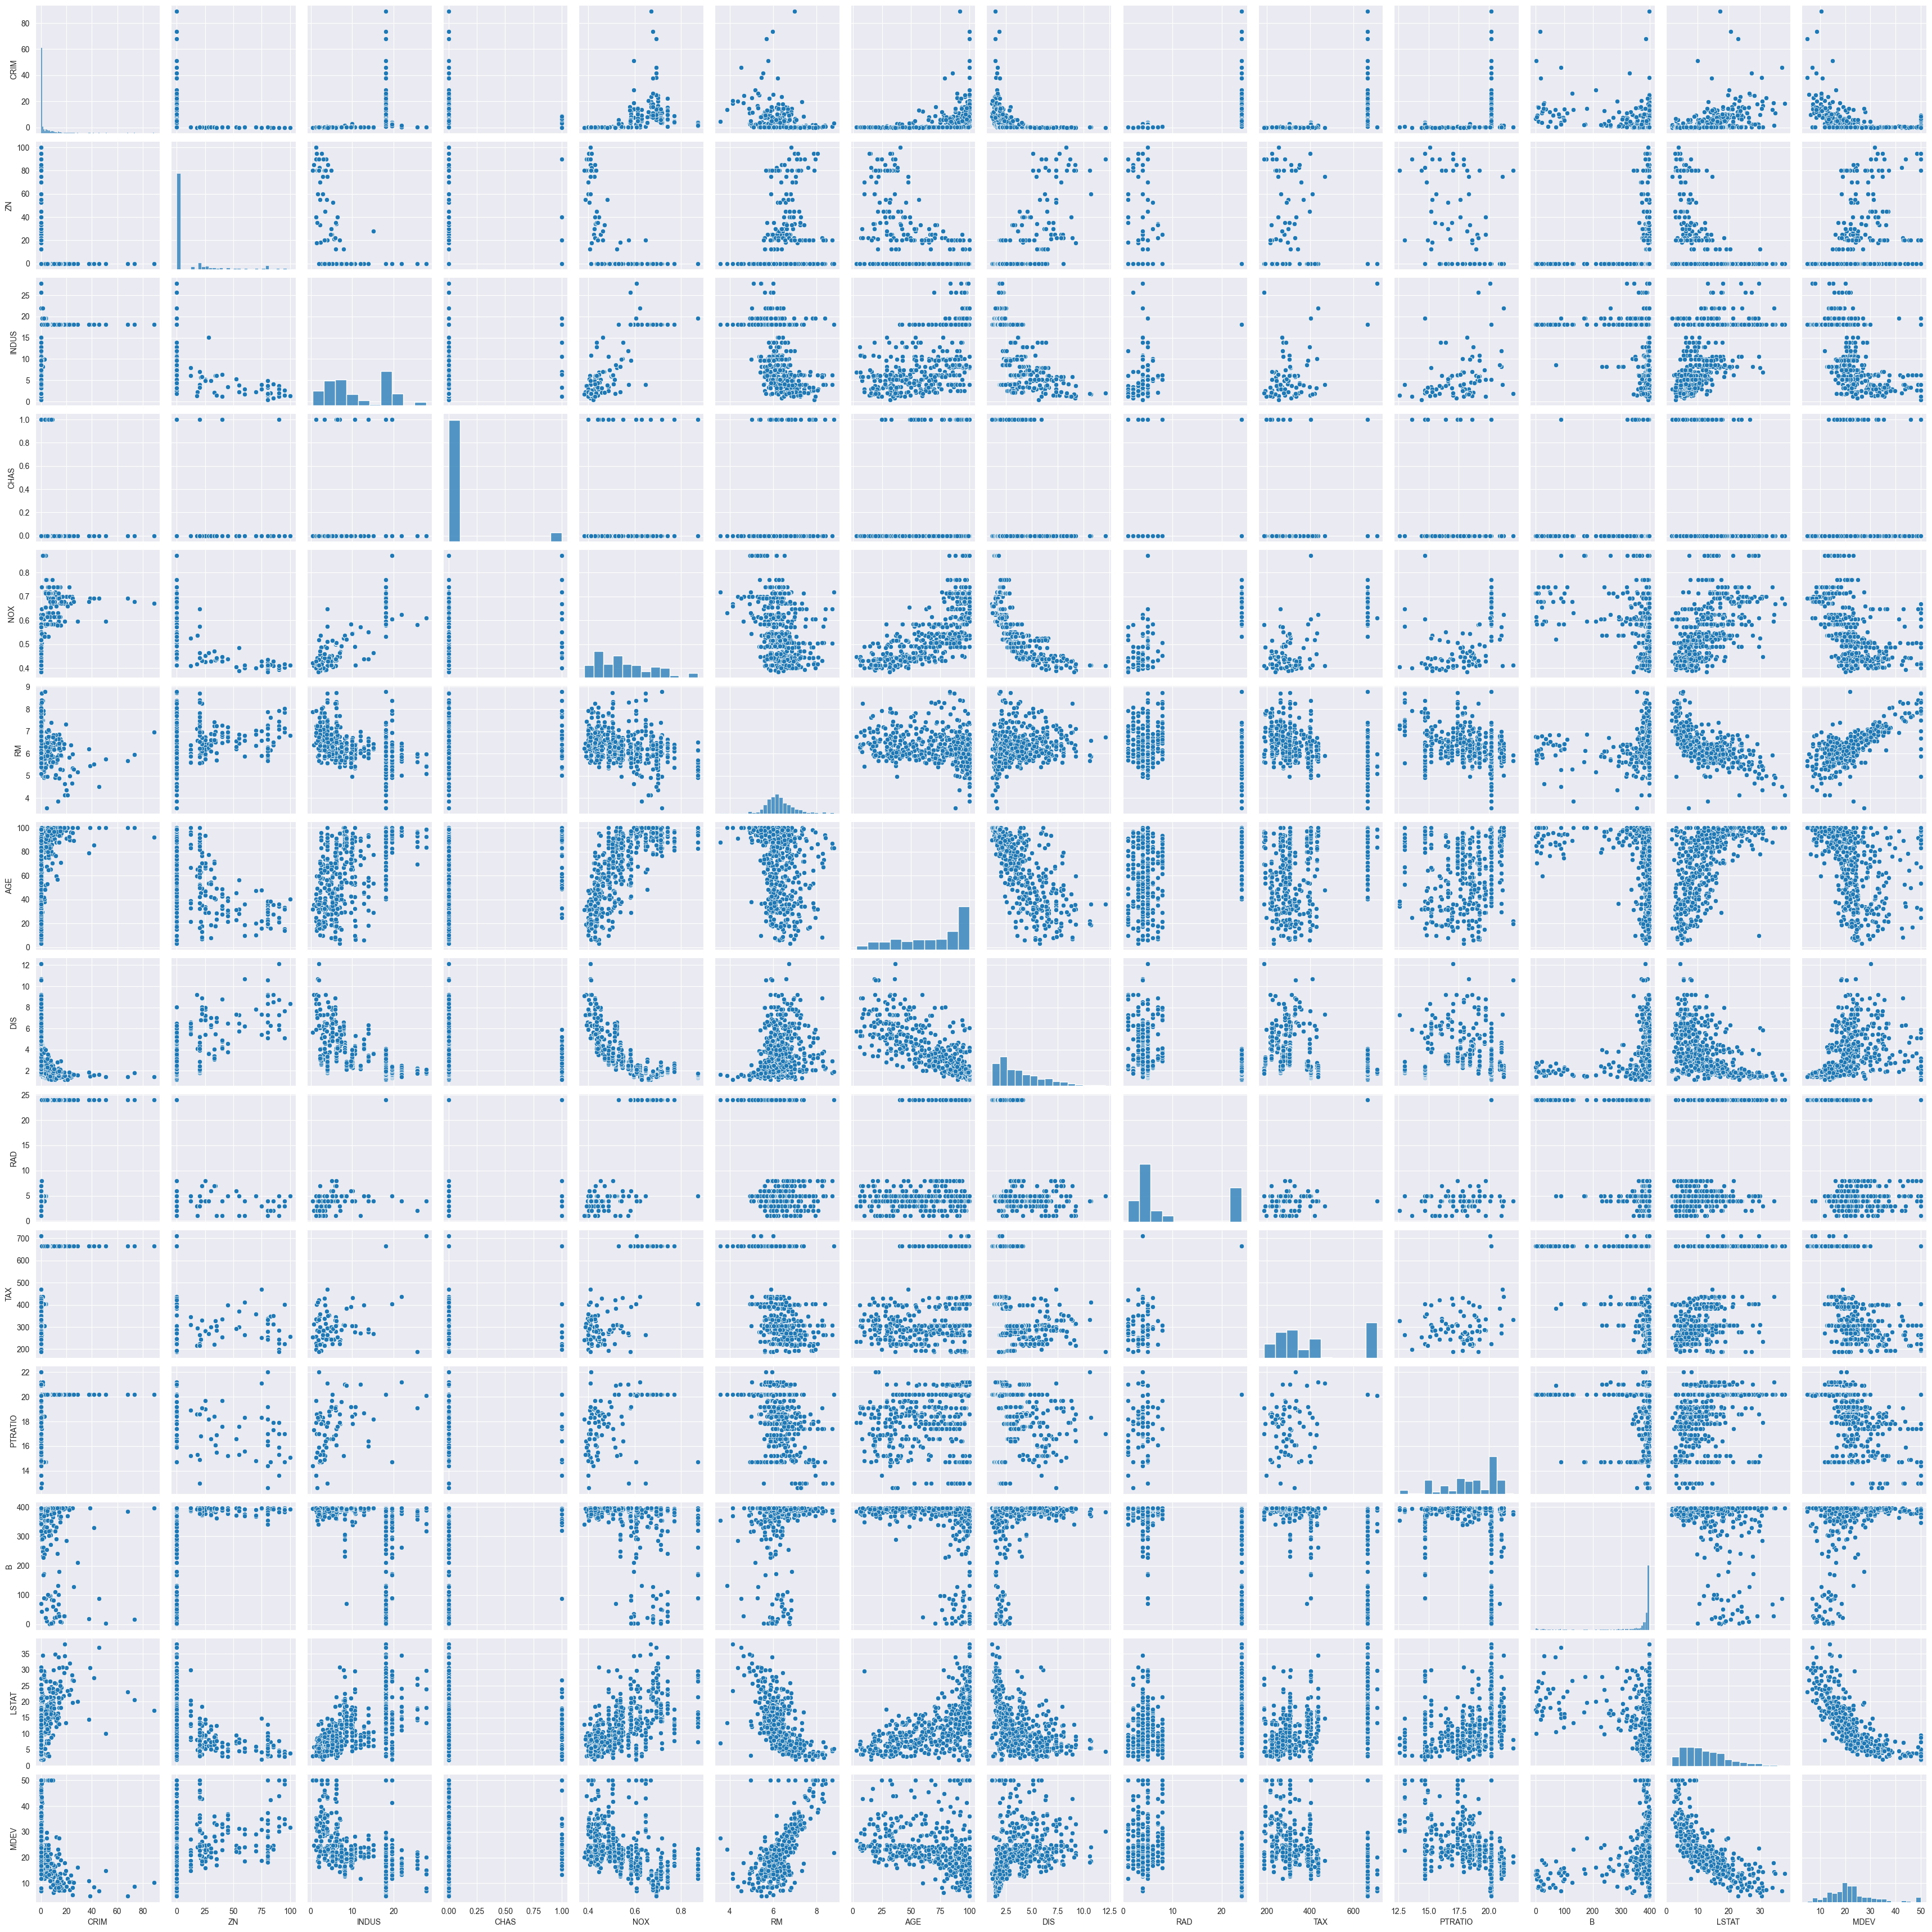

In [236]:
def print_scatter_matrix(boston_dataframe):
    sns.pairplot(boston_dataframe, diag_kind='hist')
    plt.show()
print_scatter_matrix(boston_dataframe)

In [205]:

fig=make_subplots(rows=3,cols=2,subplot_titles=['Plot MEDV in function of LSTAT',
                                                'Plot MEDV in function of AGE',
                                                'Plot MEDV in function of RM',
                                                'Plot AGE in function of LSTAT',
                                                'Plot CRIM in function of MDEV'])
fig.add_trace(go.Scatter(x=boston_dataframe['LSTAT'], y=boston_dataframe['MDEV'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=boston_dataframe['AGE'], y=boston_dataframe['MDEV'], mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=boston_dataframe['RM'], y=boston_dataframe['MDEV'], mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=boston_dataframe['LSTAT'], y=boston_dataframe['AGE'], mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(x=boston_dataframe['CRIM'], y=boston_dataframe['MDEV'], mode='markers'), row=3, col=1)
    
fig.update_layout(height=800, width=1200, title="Distribution of Boston Dataframe",showlegend=False)
fig.show()

In [223]:
def boston_fit_model(boston_dataframe):
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    x = model_dataset.iloc[:, :-1]
    y = model_dataset.iloc[:, 1]
    regressor.fit(x, y)
    return regressor
   

In [224]:
def boston_predict(estimator, array_to_predict):
    return estimator.predict(array_to_predict)

In [225]:
data = np.array([1, 2, 3]).reshape(-1,1)
estimator = boston_fit_model(boston_dataframe)

In [231]:
boston_fit_model(boston_dataframe)
y_pred=boston_predict(estimator,data)
y_pred

C:\Users\lomak\PycharmProjects\my_tu_verras\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([-25.5685118 , -16.46640281,  -7.36429383])

In [232]:
def print_model_prediction_evaluator(base_test, prediction):
  print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))

In [233]:
print_model_prediction_evaluator(data,y_pred)

Mean Absolute Error: 18.466402814077938
Mean Squared Error: 384.77081285373396
Root Mean Squared Error: 19.61557577165998
